In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
%matplotlib notebook

In [2]:
class PrepareData(Dataset):
    def __init__(self, X, y):
        if not torch.is_tensor(X):
            self.X = X.applymap(lambda s: complex(s.replace('i', 'j'))).values
            self.X = torch.tensor(self.X,dtype=torch.complex64)
        else:
            self.X = X
        if not torch.is_tensor(y):
            self.y = y.iloc[:,:].values
            self.y = torch.tensor(self.y,dtype=torch.int64)
        else:
            self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
class GaussianNoise(torch.nn.Module):
    """Gaussian noise regularizer.

    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """
    def __init__(self, sigma=0.1, is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.register_buffer('noise', torch.tensor(0))

    def forward(self, x):
        if self.training and self.sigma != 0:
            scale = self.sigma * x.detach() if self.is_relative_detach else self.sigma * x
            sampled_noise = self.noise.expand(*x.size()).float().normal_() * scale
            x = x + sampled_noise
        return x 

In [3]:
x_train = pd.read_csv('signal_trainv2.csv',usecols=range(1,1025))
y_train = pd.read_csv('train_labelsv2.csv',usecols=range(1,2))

In [4]:
print(x_train.shape)
print(y_train.shape)

(52000, 1024)
(52000, 1)


In [5]:
dstrain = PrepareData(X=x_train, y=y_train)

In [6]:
dstrain[2][0]

tensor([-2.1396-14.9520j, -6.8059-4.8118j, 10.9670-0.0402j,  ...,
        -3.5033+2.5983j,  0.0877+0.0644j, -1.5896-0.3987j])

In [7]:
dstrain = DataLoader(dstrain, batch_size=2, shuffle = False)

In [8]:
for index, (x,y) in enumerate(dstrain):
    print(index, x.shape, y.shape)

0 torch.Size([2, 1024]) torch.Size([2, 1])
1 torch.Size([2, 1024]) torch.Size([2, 1])
2 torch.Size([2, 1024]) torch.Size([2, 1])
3 torch.Size([2, 1024]) torch.Size([2, 1])
4 torch.Size([2, 1024]) torch.Size([2, 1])
5 torch.Size([2, 1024]) torch.Size([2, 1])
6 torch.Size([2, 1024]) torch.Size([2, 1])
7 torch.Size([2, 1024]) torch.Size([2, 1])
8 torch.Size([2, 1024]) torch.Size([2, 1])
9 torch.Size([2, 1024]) torch.Size([2, 1])
10 torch.Size([2, 1024]) torch.Size([2, 1])
11 torch.Size([2, 1024]) torch.Size([2, 1])
12 torch.Size([2, 1024]) torch.Size([2, 1])
13 torch.Size([2, 1024]) torch.Size([2, 1])
14 torch.Size([2, 1024]) torch.Size([2, 1])
15 torch.Size([2, 1024]) torch.Size([2, 1])
16 torch.Size([2, 1024]) torch.Size([2, 1])
17 torch.Size([2, 1024]) torch.Size([2, 1])
18 torch.Size([2, 1024]) torch.Size([2, 1])
19 torch.Size([2, 1024]) torch.Size([2, 1])
20 torch.Size([2, 1024]) torch.Size([2, 1])
21 torch.Size([2, 1024]) torch.Size([2, 1])
22 torch.Size([2, 1024]) torch.Size([2, 1]

666 torch.Size([2, 1024]) torch.Size([2, 1])
667 torch.Size([2, 1024]) torch.Size([2, 1])
668 torch.Size([2, 1024]) torch.Size([2, 1])
669 torch.Size([2, 1024]) torch.Size([2, 1])
670 torch.Size([2, 1024]) torch.Size([2, 1])
671 torch.Size([2, 1024]) torch.Size([2, 1])
672 torch.Size([2, 1024]) torch.Size([2, 1])
673 torch.Size([2, 1024]) torch.Size([2, 1])
674 torch.Size([2, 1024]) torch.Size([2, 1])
675 torch.Size([2, 1024]) torch.Size([2, 1])
676 torch.Size([2, 1024]) torch.Size([2, 1])
677 torch.Size([2, 1024]) torch.Size([2, 1])
678 torch.Size([2, 1024]) torch.Size([2, 1])
679 torch.Size([2, 1024]) torch.Size([2, 1])
680 torch.Size([2, 1024]) torch.Size([2, 1])
681 torch.Size([2, 1024]) torch.Size([2, 1])
682 torch.Size([2, 1024]) torch.Size([2, 1])
683 torch.Size([2, 1024]) torch.Size([2, 1])
684 torch.Size([2, 1024]) torch.Size([2, 1])
685 torch.Size([2, 1024]) torch.Size([2, 1])
686 torch.Size([2, 1024]) torch.Size([2, 1])
687 torch.Size([2, 1024]) torch.Size([2, 1])
688 torch.

1343 torch.Size([2, 1024]) torch.Size([2, 1])
1344 torch.Size([2, 1024]) torch.Size([2, 1])
1345 torch.Size([2, 1024]) torch.Size([2, 1])
1346 torch.Size([2, 1024]) torch.Size([2, 1])
1347 torch.Size([2, 1024]) torch.Size([2, 1])
1348 torch.Size([2, 1024]) torch.Size([2, 1])
1349 torch.Size([2, 1024]) torch.Size([2, 1])
1350 torch.Size([2, 1024]) torch.Size([2, 1])
1351 torch.Size([2, 1024]) torch.Size([2, 1])
1352 torch.Size([2, 1024]) torch.Size([2, 1])
1353 torch.Size([2, 1024]) torch.Size([2, 1])
1354 torch.Size([2, 1024]) torch.Size([2, 1])
1355 torch.Size([2, 1024]) torch.Size([2, 1])
1356 torch.Size([2, 1024]) torch.Size([2, 1])
1357 torch.Size([2, 1024]) torch.Size([2, 1])
1358 torch.Size([2, 1024]) torch.Size([2, 1])
1359 torch.Size([2, 1024]) torch.Size([2, 1])
1360 torch.Size([2, 1024]) torch.Size([2, 1])
1361 torch.Size([2, 1024]) torch.Size([2, 1])
1362 torch.Size([2, 1024]) torch.Size([2, 1])
1363 torch.Size([2, 1024]) torch.Size([2, 1])
1364 torch.Size([2, 1024]) torch.S

2035 torch.Size([2, 1024]) torch.Size([2, 1])
2036 torch.Size([2, 1024]) torch.Size([2, 1])
2037 torch.Size([2, 1024]) torch.Size([2, 1])
2038 torch.Size([2, 1024]) torch.Size([2, 1])
2039 torch.Size([2, 1024]) torch.Size([2, 1])
2040 torch.Size([2, 1024]) torch.Size([2, 1])
2041 torch.Size([2, 1024]) torch.Size([2, 1])
2042 torch.Size([2, 1024]) torch.Size([2, 1])
2043 torch.Size([2, 1024]) torch.Size([2, 1])
2044 torch.Size([2, 1024]) torch.Size([2, 1])
2045 torch.Size([2, 1024]) torch.Size([2, 1])
2046 torch.Size([2, 1024]) torch.Size([2, 1])
2047 torch.Size([2, 1024]) torch.Size([2, 1])
2048 torch.Size([2, 1024]) torch.Size([2, 1])
2049 torch.Size([2, 1024]) torch.Size([2, 1])
2050 torch.Size([2, 1024]) torch.Size([2, 1])
2051 torch.Size([2, 1024]) torch.Size([2, 1])
2052 torch.Size([2, 1024]) torch.Size([2, 1])
2053 torch.Size([2, 1024]) torch.Size([2, 1])
2054 torch.Size([2, 1024]) torch.Size([2, 1])
2055 torch.Size([2, 1024]) torch.Size([2, 1])
2056 torch.Size([2, 1024]) torch.S

2741 torch.Size([2, 1024]) torch.Size([2, 1])
2742 torch.Size([2, 1024]) torch.Size([2, 1])
2743 torch.Size([2, 1024]) torch.Size([2, 1])
2744 torch.Size([2, 1024]) torch.Size([2, 1])
2745 torch.Size([2, 1024]) torch.Size([2, 1])
2746 torch.Size([2, 1024]) torch.Size([2, 1])
2747 torch.Size([2, 1024]) torch.Size([2, 1])
2748 torch.Size([2, 1024]) torch.Size([2, 1])
2749 torch.Size([2, 1024]) torch.Size([2, 1])
2750 torch.Size([2, 1024]) torch.Size([2, 1])
2751 torch.Size([2, 1024]) torch.Size([2, 1])
2752 torch.Size([2, 1024]) torch.Size([2, 1])
2753 torch.Size([2, 1024]) torch.Size([2, 1])
2754 torch.Size([2, 1024]) torch.Size([2, 1])
2755 torch.Size([2, 1024]) torch.Size([2, 1])
2756 torch.Size([2, 1024]) torch.Size([2, 1])
2757 torch.Size([2, 1024]) torch.Size([2, 1])
2758 torch.Size([2, 1024]) torch.Size([2, 1])
2759 torch.Size([2, 1024]) torch.Size([2, 1])
2760 torch.Size([2, 1024]) torch.Size([2, 1])
2761 torch.Size([2, 1024]) torch.Size([2, 1])
2762 torch.Size([2, 1024]) torch.S

3425 torch.Size([2, 1024]) torch.Size([2, 1])
3426 torch.Size([2, 1024]) torch.Size([2, 1])
3427 torch.Size([2, 1024]) torch.Size([2, 1])
3428 torch.Size([2, 1024]) torch.Size([2, 1])
3429 torch.Size([2, 1024]) torch.Size([2, 1])
3430 torch.Size([2, 1024]) torch.Size([2, 1])
3431 torch.Size([2, 1024]) torch.Size([2, 1])
3432 torch.Size([2, 1024]) torch.Size([2, 1])
3433 torch.Size([2, 1024]) torch.Size([2, 1])
3434 torch.Size([2, 1024]) torch.Size([2, 1])
3435 torch.Size([2, 1024]) torch.Size([2, 1])
3436 torch.Size([2, 1024]) torch.Size([2, 1])
3437 torch.Size([2, 1024]) torch.Size([2, 1])
3438 torch.Size([2, 1024]) torch.Size([2, 1])
3439 torch.Size([2, 1024]) torch.Size([2, 1])
3440 torch.Size([2, 1024]) torch.Size([2, 1])
3441 torch.Size([2, 1024]) torch.Size([2, 1])
3442 torch.Size([2, 1024]) torch.Size([2, 1])
3443 torch.Size([2, 1024]) torch.Size([2, 1])
3444 torch.Size([2, 1024]) torch.Size([2, 1])
3445 torch.Size([2, 1024]) torch.Size([2, 1])
3446 torch.Size([2, 1024]) torch.S

4102 torch.Size([2, 1024]) torch.Size([2, 1])
4103 torch.Size([2, 1024]) torch.Size([2, 1])
4104 torch.Size([2, 1024]) torch.Size([2, 1])
4105 torch.Size([2, 1024]) torch.Size([2, 1])
4106 torch.Size([2, 1024]) torch.Size([2, 1])
4107 torch.Size([2, 1024]) torch.Size([2, 1])
4108 torch.Size([2, 1024]) torch.Size([2, 1])
4109 torch.Size([2, 1024]) torch.Size([2, 1])
4110 torch.Size([2, 1024]) torch.Size([2, 1])
4111 torch.Size([2, 1024]) torch.Size([2, 1])
4112 torch.Size([2, 1024]) torch.Size([2, 1])
4113 torch.Size([2, 1024]) torch.Size([2, 1])
4114 torch.Size([2, 1024]) torch.Size([2, 1])
4115 torch.Size([2, 1024]) torch.Size([2, 1])
4116 torch.Size([2, 1024]) torch.Size([2, 1])
4117 torch.Size([2, 1024]) torch.Size([2, 1])
4118 torch.Size([2, 1024]) torch.Size([2, 1])
4119 torch.Size([2, 1024]) torch.Size([2, 1])
4120 torch.Size([2, 1024]) torch.Size([2, 1])
4121 torch.Size([2, 1024]) torch.Size([2, 1])
4122 torch.Size([2, 1024]) torch.Size([2, 1])
4123 torch.Size([2, 1024]) torch.S

4790 torch.Size([2, 1024]) torch.Size([2, 1])
4791 torch.Size([2, 1024]) torch.Size([2, 1])
4792 torch.Size([2, 1024]) torch.Size([2, 1])
4793 torch.Size([2, 1024]) torch.Size([2, 1])
4794 torch.Size([2, 1024]) torch.Size([2, 1])
4795 torch.Size([2, 1024]) torch.Size([2, 1])
4796 torch.Size([2, 1024]) torch.Size([2, 1])
4797 torch.Size([2, 1024]) torch.Size([2, 1])
4798 torch.Size([2, 1024]) torch.Size([2, 1])
4799 torch.Size([2, 1024]) torch.Size([2, 1])
4800 torch.Size([2, 1024]) torch.Size([2, 1])
4801 torch.Size([2, 1024]) torch.Size([2, 1])
4802 torch.Size([2, 1024]) torch.Size([2, 1])
4803 torch.Size([2, 1024]) torch.Size([2, 1])
4804 torch.Size([2, 1024]) torch.Size([2, 1])
4805 torch.Size([2, 1024]) torch.Size([2, 1])
4806 torch.Size([2, 1024]) torch.Size([2, 1])
4807 torch.Size([2, 1024]) torch.Size([2, 1])
4808 torch.Size([2, 1024]) torch.Size([2, 1])
4809 torch.Size([2, 1024]) torch.Size([2, 1])
4810 torch.Size([2, 1024]) torch.Size([2, 1])
4811 torch.Size([2, 1024]) torch.S

5486 torch.Size([2, 1024]) torch.Size([2, 1])
5487 torch.Size([2, 1024]) torch.Size([2, 1])
5488 torch.Size([2, 1024]) torch.Size([2, 1])
5489 torch.Size([2, 1024]) torch.Size([2, 1])
5490 torch.Size([2, 1024]) torch.Size([2, 1])
5491 torch.Size([2, 1024]) torch.Size([2, 1])
5492 torch.Size([2, 1024]) torch.Size([2, 1])
5493 torch.Size([2, 1024]) torch.Size([2, 1])
5494 torch.Size([2, 1024]) torch.Size([2, 1])
5495 torch.Size([2, 1024]) torch.Size([2, 1])
5496 torch.Size([2, 1024]) torch.Size([2, 1])
5497 torch.Size([2, 1024]) torch.Size([2, 1])
5498 torch.Size([2, 1024]) torch.Size([2, 1])
5499 torch.Size([2, 1024]) torch.Size([2, 1])
5500 torch.Size([2, 1024]) torch.Size([2, 1])
5501 torch.Size([2, 1024]) torch.Size([2, 1])
5502 torch.Size([2, 1024]) torch.Size([2, 1])
5503 torch.Size([2, 1024]) torch.Size([2, 1])
5504 torch.Size([2, 1024]) torch.Size([2, 1])
5505 torch.Size([2, 1024]) torch.Size([2, 1])
5506 torch.Size([2, 1024]) torch.Size([2, 1])
5507 torch.Size([2, 1024]) torch.S

6193 torch.Size([2, 1024]) torch.Size([2, 1])
6194 torch.Size([2, 1024]) torch.Size([2, 1])
6195 torch.Size([2, 1024]) torch.Size([2, 1])
6196 torch.Size([2, 1024]) torch.Size([2, 1])
6197 torch.Size([2, 1024]) torch.Size([2, 1])
6198 torch.Size([2, 1024]) torch.Size([2, 1])
6199 torch.Size([2, 1024]) torch.Size([2, 1])
6200 torch.Size([2, 1024]) torch.Size([2, 1])
6201 torch.Size([2, 1024]) torch.Size([2, 1])
6202 torch.Size([2, 1024]) torch.Size([2, 1])
6203 torch.Size([2, 1024]) torch.Size([2, 1])
6204 torch.Size([2, 1024]) torch.Size([2, 1])
6205 torch.Size([2, 1024]) torch.Size([2, 1])
6206 torch.Size([2, 1024]) torch.Size([2, 1])
6207 torch.Size([2, 1024]) torch.Size([2, 1])
6208 torch.Size([2, 1024]) torch.Size([2, 1])
6209 torch.Size([2, 1024]) torch.Size([2, 1])
6210 torch.Size([2, 1024]) torch.Size([2, 1])
6211 torch.Size([2, 1024]) torch.Size([2, 1])
6212 torch.Size([2, 1024]) torch.Size([2, 1])
6213 torch.Size([2, 1024]) torch.Size([2, 1])
6214 torch.Size([2, 1024]) torch.S

6895 torch.Size([2, 1024]) torch.Size([2, 1])
6896 torch.Size([2, 1024]) torch.Size([2, 1])
6897 torch.Size([2, 1024]) torch.Size([2, 1])
6898 torch.Size([2, 1024]) torch.Size([2, 1])
6899 torch.Size([2, 1024]) torch.Size([2, 1])
6900 torch.Size([2, 1024]) torch.Size([2, 1])
6901 torch.Size([2, 1024]) torch.Size([2, 1])
6902 torch.Size([2, 1024]) torch.Size([2, 1])
6903 torch.Size([2, 1024]) torch.Size([2, 1])
6904 torch.Size([2, 1024]) torch.Size([2, 1])
6905 torch.Size([2, 1024]) torch.Size([2, 1])
6906 torch.Size([2, 1024]) torch.Size([2, 1])
6907 torch.Size([2, 1024]) torch.Size([2, 1])
6908 torch.Size([2, 1024]) torch.Size([2, 1])
6909 torch.Size([2, 1024]) torch.Size([2, 1])
6910 torch.Size([2, 1024]) torch.Size([2, 1])
6911 torch.Size([2, 1024]) torch.Size([2, 1])
6912 torch.Size([2, 1024]) torch.Size([2, 1])
6913 torch.Size([2, 1024]) torch.Size([2, 1])
6914 torch.Size([2, 1024]) torch.Size([2, 1])
6915 torch.Size([2, 1024]) torch.Size([2, 1])
6916 torch.Size([2, 1024]) torch.S

7569 torch.Size([2, 1024]) torch.Size([2, 1])
7570 torch.Size([2, 1024]) torch.Size([2, 1])
7571 torch.Size([2, 1024]) torch.Size([2, 1])
7572 torch.Size([2, 1024]) torch.Size([2, 1])
7573 torch.Size([2, 1024]) torch.Size([2, 1])
7574 torch.Size([2, 1024]) torch.Size([2, 1])
7575 torch.Size([2, 1024]) torch.Size([2, 1])
7576 torch.Size([2, 1024]) torch.Size([2, 1])
7577 torch.Size([2, 1024]) torch.Size([2, 1])
7578 torch.Size([2, 1024]) torch.Size([2, 1])
7579 torch.Size([2, 1024]) torch.Size([2, 1])
7580 torch.Size([2, 1024]) torch.Size([2, 1])
7581 torch.Size([2, 1024]) torch.Size([2, 1])
7582 torch.Size([2, 1024]) torch.Size([2, 1])
7583 torch.Size([2, 1024]) torch.Size([2, 1])
7584 torch.Size([2, 1024]) torch.Size([2, 1])
7585 torch.Size([2, 1024]) torch.Size([2, 1])
7586 torch.Size([2, 1024]) torch.Size([2, 1])
7587 torch.Size([2, 1024]) torch.Size([2, 1])
7588 torch.Size([2, 1024]) torch.Size([2, 1])
7589 torch.Size([2, 1024]) torch.Size([2, 1])
7590 torch.Size([2, 1024]) torch.S

8254 torch.Size([2, 1024]) torch.Size([2, 1])
8255 torch.Size([2, 1024]) torch.Size([2, 1])
8256 torch.Size([2, 1024]) torch.Size([2, 1])
8257 torch.Size([2, 1024]) torch.Size([2, 1])
8258 torch.Size([2, 1024]) torch.Size([2, 1])
8259 torch.Size([2, 1024]) torch.Size([2, 1])
8260 torch.Size([2, 1024]) torch.Size([2, 1])
8261 torch.Size([2, 1024]) torch.Size([2, 1])
8262 torch.Size([2, 1024]) torch.Size([2, 1])
8263 torch.Size([2, 1024]) torch.Size([2, 1])
8264 torch.Size([2, 1024]) torch.Size([2, 1])
8265 torch.Size([2, 1024]) torch.Size([2, 1])
8266 torch.Size([2, 1024]) torch.Size([2, 1])
8267 torch.Size([2, 1024]) torch.Size([2, 1])
8268 torch.Size([2, 1024]) torch.Size([2, 1])
8269 torch.Size([2, 1024]) torch.Size([2, 1])
8270 torch.Size([2, 1024]) torch.Size([2, 1])
8271 torch.Size([2, 1024]) torch.Size([2, 1])
8272 torch.Size([2, 1024]) torch.Size([2, 1])
8273 torch.Size([2, 1024]) torch.Size([2, 1])
8274 torch.Size([2, 1024]) torch.Size([2, 1])
8275 torch.Size([2, 1024]) torch.S

8942 torch.Size([2, 1024]) torch.Size([2, 1])
8943 torch.Size([2, 1024]) torch.Size([2, 1])
8944 torch.Size([2, 1024]) torch.Size([2, 1])
8945 torch.Size([2, 1024]) torch.Size([2, 1])
8946 torch.Size([2, 1024]) torch.Size([2, 1])
8947 torch.Size([2, 1024]) torch.Size([2, 1])
8948 torch.Size([2, 1024]) torch.Size([2, 1])
8949 torch.Size([2, 1024]) torch.Size([2, 1])
8950 torch.Size([2, 1024]) torch.Size([2, 1])
8951 torch.Size([2, 1024]) torch.Size([2, 1])
8952 torch.Size([2, 1024]) torch.Size([2, 1])
8953 torch.Size([2, 1024]) torch.Size([2, 1])
8954 torch.Size([2, 1024]) torch.Size([2, 1])
8955 torch.Size([2, 1024]) torch.Size([2, 1])
8956 torch.Size([2, 1024]) torch.Size([2, 1])
8957 torch.Size([2, 1024]) torch.Size([2, 1])
8958 torch.Size([2, 1024]) torch.Size([2, 1])
8959 torch.Size([2, 1024]) torch.Size([2, 1])
8960 torch.Size([2, 1024]) torch.Size([2, 1])
8961 torch.Size([2, 1024]) torch.Size([2, 1])
8962 torch.Size([2, 1024]) torch.Size([2, 1])
8963 torch.Size([2, 1024]) torch.S

9628 torch.Size([2, 1024]) torch.Size([2, 1])
9629 torch.Size([2, 1024]) torch.Size([2, 1])
9630 torch.Size([2, 1024]) torch.Size([2, 1])
9631 torch.Size([2, 1024]) torch.Size([2, 1])
9632 torch.Size([2, 1024]) torch.Size([2, 1])
9633 torch.Size([2, 1024]) torch.Size([2, 1])
9634 torch.Size([2, 1024]) torch.Size([2, 1])
9635 torch.Size([2, 1024]) torch.Size([2, 1])
9636 torch.Size([2, 1024]) torch.Size([2, 1])
9637 torch.Size([2, 1024]) torch.Size([2, 1])
9638 torch.Size([2, 1024]) torch.Size([2, 1])
9639 torch.Size([2, 1024]) torch.Size([2, 1])
9640 torch.Size([2, 1024]) torch.Size([2, 1])
9641 torch.Size([2, 1024]) torch.Size([2, 1])
9642 torch.Size([2, 1024]) torch.Size([2, 1])
9643 torch.Size([2, 1024]) torch.Size([2, 1])
9644 torch.Size([2, 1024]) torch.Size([2, 1])
9645 torch.Size([2, 1024]) torch.Size([2, 1])
9646 torch.Size([2, 1024]) torch.Size([2, 1])
9647 torch.Size([2, 1024]) torch.Size([2, 1])
9648 torch.Size([2, 1024]) torch.Size([2, 1])
9649 torch.Size([2, 1024]) torch.S

10300 torch.Size([2, 1024]) torch.Size([2, 1])
10301 torch.Size([2, 1024]) torch.Size([2, 1])
10302 torch.Size([2, 1024]) torch.Size([2, 1])
10303 torch.Size([2, 1024]) torch.Size([2, 1])
10304 torch.Size([2, 1024]) torch.Size([2, 1])
10305 torch.Size([2, 1024]) torch.Size([2, 1])
10306 torch.Size([2, 1024]) torch.Size([2, 1])
10307 torch.Size([2, 1024]) torch.Size([2, 1])
10308 torch.Size([2, 1024]) torch.Size([2, 1])
10309 torch.Size([2, 1024]) torch.Size([2, 1])
10310 torch.Size([2, 1024]) torch.Size([2, 1])
10311 torch.Size([2, 1024]) torch.Size([2, 1])
10312 torch.Size([2, 1024]) torch.Size([2, 1])
10313 torch.Size([2, 1024]) torch.Size([2, 1])
10314 torch.Size([2, 1024]) torch.Size([2, 1])
10315 torch.Size([2, 1024]) torch.Size([2, 1])
10316 torch.Size([2, 1024]) torch.Size([2, 1])
10317 torch.Size([2, 1024]) torch.Size([2, 1])
10318 torch.Size([2, 1024]) torch.Size([2, 1])
10319 torch.Size([2, 1024]) torch.Size([2, 1])
10320 torch.Size([2, 1024]) torch.Size([2, 1])
10321 torch.S

10975 torch.Size([2, 1024]) torch.Size([2, 1])
10976 torch.Size([2, 1024]) torch.Size([2, 1])
10977 torch.Size([2, 1024]) torch.Size([2, 1])
10978 torch.Size([2, 1024]) torch.Size([2, 1])
10979 torch.Size([2, 1024]) torch.Size([2, 1])
10980 torch.Size([2, 1024]) torch.Size([2, 1])
10981 torch.Size([2, 1024]) torch.Size([2, 1])
10982 torch.Size([2, 1024]) torch.Size([2, 1])
10983 torch.Size([2, 1024]) torch.Size([2, 1])
10984 torch.Size([2, 1024]) torch.Size([2, 1])
10985 torch.Size([2, 1024]) torch.Size([2, 1])
10986 torch.Size([2, 1024]) torch.Size([2, 1])
10987 torch.Size([2, 1024]) torch.Size([2, 1])
10988 torch.Size([2, 1024]) torch.Size([2, 1])
10989 torch.Size([2, 1024]) torch.Size([2, 1])
10990 torch.Size([2, 1024]) torch.Size([2, 1])
10991 torch.Size([2, 1024]) torch.Size([2, 1])
10992 torch.Size([2, 1024]) torch.Size([2, 1])
10993 torch.Size([2, 1024]) torch.Size([2, 1])
10994 torch.Size([2, 1024]) torch.Size([2, 1])
10995 torch.Size([2, 1024]) torch.Size([2, 1])
10996 torch.S

11645 torch.Size([2, 1024]) torch.Size([2, 1])
11646 torch.Size([2, 1024]) torch.Size([2, 1])
11647 torch.Size([2, 1024]) torch.Size([2, 1])
11648 torch.Size([2, 1024]) torch.Size([2, 1])
11649 torch.Size([2, 1024]) torch.Size([2, 1])
11650 torch.Size([2, 1024]) torch.Size([2, 1])
11651 torch.Size([2, 1024]) torch.Size([2, 1])
11652 torch.Size([2, 1024]) torch.Size([2, 1])
11653 torch.Size([2, 1024]) torch.Size([2, 1])
11654 torch.Size([2, 1024]) torch.Size([2, 1])
11655 torch.Size([2, 1024]) torch.Size([2, 1])
11656 torch.Size([2, 1024]) torch.Size([2, 1])
11657 torch.Size([2, 1024]) torch.Size([2, 1])
11658 torch.Size([2, 1024]) torch.Size([2, 1])
11659 torch.Size([2, 1024]) torch.Size([2, 1])
11660 torch.Size([2, 1024]) torch.Size([2, 1])
11661 torch.Size([2, 1024]) torch.Size([2, 1])
11662 torch.Size([2, 1024]) torch.Size([2, 1])
11663 torch.Size([2, 1024]) torch.Size([2, 1])
11664 torch.Size([2, 1024]) torch.Size([2, 1])
11665 torch.Size([2, 1024]) torch.Size([2, 1])
11666 torch.S

12307 torch.Size([2, 1024]) torch.Size([2, 1])
12308 torch.Size([2, 1024]) torch.Size([2, 1])
12309 torch.Size([2, 1024]) torch.Size([2, 1])
12310 torch.Size([2, 1024]) torch.Size([2, 1])
12311 torch.Size([2, 1024]) torch.Size([2, 1])
12312 torch.Size([2, 1024]) torch.Size([2, 1])
12313 torch.Size([2, 1024]) torch.Size([2, 1])
12314 torch.Size([2, 1024]) torch.Size([2, 1])
12315 torch.Size([2, 1024]) torch.Size([2, 1])
12316 torch.Size([2, 1024]) torch.Size([2, 1])
12317 torch.Size([2, 1024]) torch.Size([2, 1])
12318 torch.Size([2, 1024]) torch.Size([2, 1])
12319 torch.Size([2, 1024]) torch.Size([2, 1])
12320 torch.Size([2, 1024]) torch.Size([2, 1])
12321 torch.Size([2, 1024]) torch.Size([2, 1])
12322 torch.Size([2, 1024]) torch.Size([2, 1])
12323 torch.Size([2, 1024]) torch.Size([2, 1])
12324 torch.Size([2, 1024]) torch.Size([2, 1])
12325 torch.Size([2, 1024]) torch.Size([2, 1])
12326 torch.Size([2, 1024]) torch.Size([2, 1])
12327 torch.Size([2, 1024]) torch.Size([2, 1])
12328 torch.S

12975 torch.Size([2, 1024]) torch.Size([2, 1])
12976 torch.Size([2, 1024]) torch.Size([2, 1])
12977 torch.Size([2, 1024]) torch.Size([2, 1])
12978 torch.Size([2, 1024]) torch.Size([2, 1])
12979 torch.Size([2, 1024]) torch.Size([2, 1])
12980 torch.Size([2, 1024]) torch.Size([2, 1])
12981 torch.Size([2, 1024]) torch.Size([2, 1])
12982 torch.Size([2, 1024]) torch.Size([2, 1])
12983 torch.Size([2, 1024]) torch.Size([2, 1])
12984 torch.Size([2, 1024]) torch.Size([2, 1])
12985 torch.Size([2, 1024]) torch.Size([2, 1])
12986 torch.Size([2, 1024]) torch.Size([2, 1])
12987 torch.Size([2, 1024]) torch.Size([2, 1])
12988 torch.Size([2, 1024]) torch.Size([2, 1])
12989 torch.Size([2, 1024]) torch.Size([2, 1])
12990 torch.Size([2, 1024]) torch.Size([2, 1])
12991 torch.Size([2, 1024]) torch.Size([2, 1])
12992 torch.Size([2, 1024]) torch.Size([2, 1])
12993 torch.Size([2, 1024]) torch.Size([2, 1])
12994 torch.Size([2, 1024]) torch.Size([2, 1])
12995 torch.Size([2, 1024]) torch.Size([2, 1])
12996 torch.S

13640 torch.Size([2, 1024]) torch.Size([2, 1])
13641 torch.Size([2, 1024]) torch.Size([2, 1])
13642 torch.Size([2, 1024]) torch.Size([2, 1])
13643 torch.Size([2, 1024]) torch.Size([2, 1])
13644 torch.Size([2, 1024]) torch.Size([2, 1])
13645 torch.Size([2, 1024]) torch.Size([2, 1])
13646 torch.Size([2, 1024]) torch.Size([2, 1])
13647 torch.Size([2, 1024]) torch.Size([2, 1])
13648 torch.Size([2, 1024]) torch.Size([2, 1])
13649 torch.Size([2, 1024]) torch.Size([2, 1])
13650 torch.Size([2, 1024]) torch.Size([2, 1])
13651 torch.Size([2, 1024]) torch.Size([2, 1])
13652 torch.Size([2, 1024]) torch.Size([2, 1])
13653 torch.Size([2, 1024]) torch.Size([2, 1])
13654 torch.Size([2, 1024]) torch.Size([2, 1])
13655 torch.Size([2, 1024]) torch.Size([2, 1])
13656 torch.Size([2, 1024]) torch.Size([2, 1])
13657 torch.Size([2, 1024]) torch.Size([2, 1])
13658 torch.Size([2, 1024]) torch.Size([2, 1])
13659 torch.Size([2, 1024]) torch.Size([2, 1])
13660 torch.Size([2, 1024]) torch.Size([2, 1])
13661 torch.S

14300 torch.Size([2, 1024]) torch.Size([2, 1])
14301 torch.Size([2, 1024]) torch.Size([2, 1])
14302 torch.Size([2, 1024]) torch.Size([2, 1])
14303 torch.Size([2, 1024]) torch.Size([2, 1])
14304 torch.Size([2, 1024]) torch.Size([2, 1])
14305 torch.Size([2, 1024]) torch.Size([2, 1])
14306 torch.Size([2, 1024]) torch.Size([2, 1])
14307 torch.Size([2, 1024]) torch.Size([2, 1])
14308 torch.Size([2, 1024]) torch.Size([2, 1])
14309 torch.Size([2, 1024]) torch.Size([2, 1])
14310 torch.Size([2, 1024]) torch.Size([2, 1])
14311 torch.Size([2, 1024]) torch.Size([2, 1])
14312 torch.Size([2, 1024]) torch.Size([2, 1])
14313 torch.Size([2, 1024]) torch.Size([2, 1])
14314 torch.Size([2, 1024]) torch.Size([2, 1])
14315 torch.Size([2, 1024]) torch.Size([2, 1])
14316 torch.Size([2, 1024]) torch.Size([2, 1])
14317 torch.Size([2, 1024]) torch.Size([2, 1])
14318 torch.Size([2, 1024]) torch.Size([2, 1])
14319 torch.Size([2, 1024]) torch.Size([2, 1])
14320 torch.Size([2, 1024]) torch.Size([2, 1])
14321 torch.S

14969 torch.Size([2, 1024]) torch.Size([2, 1])
14970 torch.Size([2, 1024]) torch.Size([2, 1])
14971 torch.Size([2, 1024]) torch.Size([2, 1])
14972 torch.Size([2, 1024]) torch.Size([2, 1])
14973 torch.Size([2, 1024]) torch.Size([2, 1])
14974 torch.Size([2, 1024]) torch.Size([2, 1])
14975 torch.Size([2, 1024]) torch.Size([2, 1])
14976 torch.Size([2, 1024]) torch.Size([2, 1])
14977 torch.Size([2, 1024]) torch.Size([2, 1])
14978 torch.Size([2, 1024]) torch.Size([2, 1])
14979 torch.Size([2, 1024]) torch.Size([2, 1])
14980 torch.Size([2, 1024]) torch.Size([2, 1])
14981 torch.Size([2, 1024]) torch.Size([2, 1])
14982 torch.Size([2, 1024]) torch.Size([2, 1])
14983 torch.Size([2, 1024]) torch.Size([2, 1])
14984 torch.Size([2, 1024]) torch.Size([2, 1])
14985 torch.Size([2, 1024]) torch.Size([2, 1])
14986 torch.Size([2, 1024]) torch.Size([2, 1])
14987 torch.Size([2, 1024]) torch.Size([2, 1])
14988 torch.Size([2, 1024]) torch.Size([2, 1])
14989 torch.Size([2, 1024]) torch.Size([2, 1])
14990 torch.S

15637 torch.Size([2, 1024]) torch.Size([2, 1])
15638 torch.Size([2, 1024]) torch.Size([2, 1])
15639 torch.Size([2, 1024]) torch.Size([2, 1])
15640 torch.Size([2, 1024]) torch.Size([2, 1])
15641 torch.Size([2, 1024]) torch.Size([2, 1])
15642 torch.Size([2, 1024]) torch.Size([2, 1])
15643 torch.Size([2, 1024]) torch.Size([2, 1])
15644 torch.Size([2, 1024]) torch.Size([2, 1])
15645 torch.Size([2, 1024]) torch.Size([2, 1])
15646 torch.Size([2, 1024]) torch.Size([2, 1])
15647 torch.Size([2, 1024]) torch.Size([2, 1])
15648 torch.Size([2, 1024]) torch.Size([2, 1])
15649 torch.Size([2, 1024]) torch.Size([2, 1])
15650 torch.Size([2, 1024]) torch.Size([2, 1])
15651 torch.Size([2, 1024]) torch.Size([2, 1])
15652 torch.Size([2, 1024]) torch.Size([2, 1])
15653 torch.Size([2, 1024]) torch.Size([2, 1])
15654 torch.Size([2, 1024]) torch.Size([2, 1])
15655 torch.Size([2, 1024]) torch.Size([2, 1])
15656 torch.Size([2, 1024]) torch.Size([2, 1])
15657 torch.Size([2, 1024]) torch.Size([2, 1])
15658 torch.S

16303 torch.Size([2, 1024]) torch.Size([2, 1])
16304 torch.Size([2, 1024]) torch.Size([2, 1])
16305 torch.Size([2, 1024]) torch.Size([2, 1])
16306 torch.Size([2, 1024]) torch.Size([2, 1])
16307 torch.Size([2, 1024]) torch.Size([2, 1])
16308 torch.Size([2, 1024]) torch.Size([2, 1])
16309 torch.Size([2, 1024]) torch.Size([2, 1])
16310 torch.Size([2, 1024]) torch.Size([2, 1])
16311 torch.Size([2, 1024]) torch.Size([2, 1])
16312 torch.Size([2, 1024]) torch.Size([2, 1])
16313 torch.Size([2, 1024]) torch.Size([2, 1])
16314 torch.Size([2, 1024]) torch.Size([2, 1])
16315 torch.Size([2, 1024]) torch.Size([2, 1])
16316 torch.Size([2, 1024]) torch.Size([2, 1])
16317 torch.Size([2, 1024]) torch.Size([2, 1])
16318 torch.Size([2, 1024]) torch.Size([2, 1])
16319 torch.Size([2, 1024]) torch.Size([2, 1])
16320 torch.Size([2, 1024]) torch.Size([2, 1])
16321 torch.Size([2, 1024]) torch.Size([2, 1])
16322 torch.Size([2, 1024]) torch.Size([2, 1])
16323 torch.Size([2, 1024]) torch.Size([2, 1])
16324 torch.S

16971 torch.Size([2, 1024]) torch.Size([2, 1])
16972 torch.Size([2, 1024]) torch.Size([2, 1])
16973 torch.Size([2, 1024]) torch.Size([2, 1])
16974 torch.Size([2, 1024]) torch.Size([2, 1])
16975 torch.Size([2, 1024]) torch.Size([2, 1])
16976 torch.Size([2, 1024]) torch.Size([2, 1])
16977 torch.Size([2, 1024]) torch.Size([2, 1])
16978 torch.Size([2, 1024]) torch.Size([2, 1])
16979 torch.Size([2, 1024]) torch.Size([2, 1])
16980 torch.Size([2, 1024]) torch.Size([2, 1])
16981 torch.Size([2, 1024]) torch.Size([2, 1])
16982 torch.Size([2, 1024]) torch.Size([2, 1])
16983 torch.Size([2, 1024]) torch.Size([2, 1])
16984 torch.Size([2, 1024]) torch.Size([2, 1])
16985 torch.Size([2, 1024]) torch.Size([2, 1])
16986 torch.Size([2, 1024]) torch.Size([2, 1])
16987 torch.Size([2, 1024]) torch.Size([2, 1])
16988 torch.Size([2, 1024]) torch.Size([2, 1])
16989 torch.Size([2, 1024]) torch.Size([2, 1])
16990 torch.Size([2, 1024]) torch.Size([2, 1])
16991 torch.Size([2, 1024]) torch.Size([2, 1])
16992 torch.S

17633 torch.Size([2, 1024]) torch.Size([2, 1])
17634 torch.Size([2, 1024]) torch.Size([2, 1])
17635 torch.Size([2, 1024]) torch.Size([2, 1])
17636 torch.Size([2, 1024]) torch.Size([2, 1])
17637 torch.Size([2, 1024]) torch.Size([2, 1])
17638 torch.Size([2, 1024]) torch.Size([2, 1])
17639 torch.Size([2, 1024]) torch.Size([2, 1])
17640 torch.Size([2, 1024]) torch.Size([2, 1])
17641 torch.Size([2, 1024]) torch.Size([2, 1])
17642 torch.Size([2, 1024]) torch.Size([2, 1])
17643 torch.Size([2, 1024]) torch.Size([2, 1])
17644 torch.Size([2, 1024]) torch.Size([2, 1])
17645 torch.Size([2, 1024]) torch.Size([2, 1])
17646 torch.Size([2, 1024]) torch.Size([2, 1])
17647 torch.Size([2, 1024]) torch.Size([2, 1])
17648 torch.Size([2, 1024]) torch.Size([2, 1])
17649 torch.Size([2, 1024]) torch.Size([2, 1])
17650 torch.Size([2, 1024]) torch.Size([2, 1])
17651 torch.Size([2, 1024]) torch.Size([2, 1])
17652 torch.Size([2, 1024]) torch.Size([2, 1])
17653 torch.Size([2, 1024]) torch.Size([2, 1])
17654 torch.S

18316 torch.Size([2, 1024]) torch.Size([2, 1])
18317 torch.Size([2, 1024]) torch.Size([2, 1])
18318 torch.Size([2, 1024]) torch.Size([2, 1])
18319 torch.Size([2, 1024]) torch.Size([2, 1])
18320 torch.Size([2, 1024]) torch.Size([2, 1])
18321 torch.Size([2, 1024]) torch.Size([2, 1])
18322 torch.Size([2, 1024]) torch.Size([2, 1])
18323 torch.Size([2, 1024]) torch.Size([2, 1])
18324 torch.Size([2, 1024]) torch.Size([2, 1])
18325 torch.Size([2, 1024]) torch.Size([2, 1])
18326 torch.Size([2, 1024]) torch.Size([2, 1])
18327 torch.Size([2, 1024]) torch.Size([2, 1])
18328 torch.Size([2, 1024]) torch.Size([2, 1])
18329 torch.Size([2, 1024]) torch.Size([2, 1])
18330 torch.Size([2, 1024]) torch.Size([2, 1])
18331 torch.Size([2, 1024]) torch.Size([2, 1])
18332 torch.Size([2, 1024]) torch.Size([2, 1])
18333 torch.Size([2, 1024]) torch.Size([2, 1])
18334 torch.Size([2, 1024]) torch.Size([2, 1])
18335 torch.Size([2, 1024]) torch.Size([2, 1])
18336 torch.Size([2, 1024]) torch.Size([2, 1])
18337 torch.S

18994 torch.Size([2, 1024]) torch.Size([2, 1])
18995 torch.Size([2, 1024]) torch.Size([2, 1])
18996 torch.Size([2, 1024]) torch.Size([2, 1])
18997 torch.Size([2, 1024]) torch.Size([2, 1])
18998 torch.Size([2, 1024]) torch.Size([2, 1])
18999 torch.Size([2, 1024]) torch.Size([2, 1])
19000 torch.Size([2, 1024]) torch.Size([2, 1])
19001 torch.Size([2, 1024]) torch.Size([2, 1])
19002 torch.Size([2, 1024]) torch.Size([2, 1])
19003 torch.Size([2, 1024]) torch.Size([2, 1])
19004 torch.Size([2, 1024]) torch.Size([2, 1])
19005 torch.Size([2, 1024]) torch.Size([2, 1])
19006 torch.Size([2, 1024]) torch.Size([2, 1])
19007 torch.Size([2, 1024]) torch.Size([2, 1])
19008 torch.Size([2, 1024]) torch.Size([2, 1])
19009 torch.Size([2, 1024]) torch.Size([2, 1])
19010 torch.Size([2, 1024]) torch.Size([2, 1])
19011 torch.Size([2, 1024]) torch.Size([2, 1])
19012 torch.Size([2, 1024]) torch.Size([2, 1])
19013 torch.Size([2, 1024]) torch.Size([2, 1])
19014 torch.Size([2, 1024]) torch.Size([2, 1])
19015 torch.S

19667 torch.Size([2, 1024]) torch.Size([2, 1])
19668 torch.Size([2, 1024]) torch.Size([2, 1])
19669 torch.Size([2, 1024]) torch.Size([2, 1])
19670 torch.Size([2, 1024]) torch.Size([2, 1])
19671 torch.Size([2, 1024]) torch.Size([2, 1])
19672 torch.Size([2, 1024]) torch.Size([2, 1])
19673 torch.Size([2, 1024]) torch.Size([2, 1])
19674 torch.Size([2, 1024]) torch.Size([2, 1])
19675 torch.Size([2, 1024]) torch.Size([2, 1])
19676 torch.Size([2, 1024]) torch.Size([2, 1])
19677 torch.Size([2, 1024]) torch.Size([2, 1])
19678 torch.Size([2, 1024]) torch.Size([2, 1])
19679 torch.Size([2, 1024]) torch.Size([2, 1])
19680 torch.Size([2, 1024]) torch.Size([2, 1])
19681 torch.Size([2, 1024]) torch.Size([2, 1])
19682 torch.Size([2, 1024]) torch.Size([2, 1])
19683 torch.Size([2, 1024]) torch.Size([2, 1])
19684 torch.Size([2, 1024]) torch.Size([2, 1])
19685 torch.Size([2, 1024]) torch.Size([2, 1])
19686 torch.Size([2, 1024]) torch.Size([2, 1])
19687 torch.Size([2, 1024]) torch.Size([2, 1])
19688 torch.S

20336 torch.Size([2, 1024]) torch.Size([2, 1])
20337 torch.Size([2, 1024]) torch.Size([2, 1])
20338 torch.Size([2, 1024]) torch.Size([2, 1])
20339 torch.Size([2, 1024]) torch.Size([2, 1])
20340 torch.Size([2, 1024]) torch.Size([2, 1])
20341 torch.Size([2, 1024]) torch.Size([2, 1])
20342 torch.Size([2, 1024]) torch.Size([2, 1])
20343 torch.Size([2, 1024]) torch.Size([2, 1])
20344 torch.Size([2, 1024]) torch.Size([2, 1])
20345 torch.Size([2, 1024]) torch.Size([2, 1])
20346 torch.Size([2, 1024]) torch.Size([2, 1])
20347 torch.Size([2, 1024]) torch.Size([2, 1])
20348 torch.Size([2, 1024]) torch.Size([2, 1])
20349 torch.Size([2, 1024]) torch.Size([2, 1])
20350 torch.Size([2, 1024]) torch.Size([2, 1])
20351 torch.Size([2, 1024]) torch.Size([2, 1])
20352 torch.Size([2, 1024]) torch.Size([2, 1])
20353 torch.Size([2, 1024]) torch.Size([2, 1])
20354 torch.Size([2, 1024]) torch.Size([2, 1])
20355 torch.Size([2, 1024]) torch.Size([2, 1])
20356 torch.Size([2, 1024]) torch.Size([2, 1])
20357 torch.S

20996 torch.Size([2, 1024]) torch.Size([2, 1])
20997 torch.Size([2, 1024]) torch.Size([2, 1])
20998 torch.Size([2, 1024]) torch.Size([2, 1])
20999 torch.Size([2, 1024]) torch.Size([2, 1])
21000 torch.Size([2, 1024]) torch.Size([2, 1])
21001 torch.Size([2, 1024]) torch.Size([2, 1])
21002 torch.Size([2, 1024]) torch.Size([2, 1])
21003 torch.Size([2, 1024]) torch.Size([2, 1])
21004 torch.Size([2, 1024]) torch.Size([2, 1])
21005 torch.Size([2, 1024]) torch.Size([2, 1])
21006 torch.Size([2, 1024]) torch.Size([2, 1])
21007 torch.Size([2, 1024]) torch.Size([2, 1])
21008 torch.Size([2, 1024]) torch.Size([2, 1])
21009 torch.Size([2, 1024]) torch.Size([2, 1])
21010 torch.Size([2, 1024]) torch.Size([2, 1])
21011 torch.Size([2, 1024]) torch.Size([2, 1])
21012 torch.Size([2, 1024]) torch.Size([2, 1])
21013 torch.Size([2, 1024]) torch.Size([2, 1])
21014 torch.Size([2, 1024]) torch.Size([2, 1])
21015 torch.Size([2, 1024]) torch.Size([2, 1])
21016 torch.Size([2, 1024]) torch.Size([2, 1])
21017 torch.S

21654 torch.Size([2, 1024]) torch.Size([2, 1])
21655 torch.Size([2, 1024]) torch.Size([2, 1])
21656 torch.Size([2, 1024]) torch.Size([2, 1])
21657 torch.Size([2, 1024]) torch.Size([2, 1])
21658 torch.Size([2, 1024]) torch.Size([2, 1])
21659 torch.Size([2, 1024]) torch.Size([2, 1])
21660 torch.Size([2, 1024]) torch.Size([2, 1])
21661 torch.Size([2, 1024]) torch.Size([2, 1])
21662 torch.Size([2, 1024]) torch.Size([2, 1])
21663 torch.Size([2, 1024]) torch.Size([2, 1])
21664 torch.Size([2, 1024]) torch.Size([2, 1])
21665 torch.Size([2, 1024]) torch.Size([2, 1])
21666 torch.Size([2, 1024]) torch.Size([2, 1])
21667 torch.Size([2, 1024]) torch.Size([2, 1])
21668 torch.Size([2, 1024]) torch.Size([2, 1])
21669 torch.Size([2, 1024]) torch.Size([2, 1])
21670 torch.Size([2, 1024]) torch.Size([2, 1])
21671 torch.Size([2, 1024]) torch.Size([2, 1])
21672 torch.Size([2, 1024]) torch.Size([2, 1])
21673 torch.Size([2, 1024]) torch.Size([2, 1])
21674 torch.Size([2, 1024]) torch.Size([2, 1])
21675 torch.S

22317 torch.Size([2, 1024]) torch.Size([2, 1])
22318 torch.Size([2, 1024]) torch.Size([2, 1])
22319 torch.Size([2, 1024]) torch.Size([2, 1])
22320 torch.Size([2, 1024]) torch.Size([2, 1])
22321 torch.Size([2, 1024]) torch.Size([2, 1])
22322 torch.Size([2, 1024]) torch.Size([2, 1])
22323 torch.Size([2, 1024]) torch.Size([2, 1])
22324 torch.Size([2, 1024]) torch.Size([2, 1])
22325 torch.Size([2, 1024]) torch.Size([2, 1])
22326 torch.Size([2, 1024]) torch.Size([2, 1])
22327 torch.Size([2, 1024]) torch.Size([2, 1])
22328 torch.Size([2, 1024]) torch.Size([2, 1])
22329 torch.Size([2, 1024]) torch.Size([2, 1])
22330 torch.Size([2, 1024]) torch.Size([2, 1])
22331 torch.Size([2, 1024]) torch.Size([2, 1])
22332 torch.Size([2, 1024]) torch.Size([2, 1])
22333 torch.Size([2, 1024]) torch.Size([2, 1])
22334 torch.Size([2, 1024]) torch.Size([2, 1])
22335 torch.Size([2, 1024]) torch.Size([2, 1])
22336 torch.Size([2, 1024]) torch.Size([2, 1])
22337 torch.Size([2, 1024]) torch.Size([2, 1])
22338 torch.S

22969 torch.Size([2, 1024]) torch.Size([2, 1])
22970 torch.Size([2, 1024]) torch.Size([2, 1])
22971 torch.Size([2, 1024]) torch.Size([2, 1])
22972 torch.Size([2, 1024]) torch.Size([2, 1])
22973 torch.Size([2, 1024]) torch.Size([2, 1])
22974 torch.Size([2, 1024]) torch.Size([2, 1])
22975 torch.Size([2, 1024]) torch.Size([2, 1])
22976 torch.Size([2, 1024]) torch.Size([2, 1])
22977 torch.Size([2, 1024]) torch.Size([2, 1])
22978 torch.Size([2, 1024]) torch.Size([2, 1])
22979 torch.Size([2, 1024]) torch.Size([2, 1])
22980 torch.Size([2, 1024]) torch.Size([2, 1])
22981 torch.Size([2, 1024]) torch.Size([2, 1])
22982 torch.Size([2, 1024]) torch.Size([2, 1])
22983 torch.Size([2, 1024]) torch.Size([2, 1])
22984 torch.Size([2, 1024]) torch.Size([2, 1])
22985 torch.Size([2, 1024]) torch.Size([2, 1])
22986 torch.Size([2, 1024]) torch.Size([2, 1])
22987 torch.Size([2, 1024]) torch.Size([2, 1])
22988 torch.Size([2, 1024]) torch.Size([2, 1])
22989 torch.Size([2, 1024]) torch.Size([2, 1])
22990 torch.S

23614 torch.Size([2, 1024]) torch.Size([2, 1])
23615 torch.Size([2, 1024]) torch.Size([2, 1])
23616 torch.Size([2, 1024]) torch.Size([2, 1])
23617 torch.Size([2, 1024]) torch.Size([2, 1])
23618 torch.Size([2, 1024]) torch.Size([2, 1])
23619 torch.Size([2, 1024]) torch.Size([2, 1])
23620 torch.Size([2, 1024]) torch.Size([2, 1])
23621 torch.Size([2, 1024]) torch.Size([2, 1])
23622 torch.Size([2, 1024]) torch.Size([2, 1])
23623 torch.Size([2, 1024]) torch.Size([2, 1])
23624 torch.Size([2, 1024]) torch.Size([2, 1])
23625 torch.Size([2, 1024]) torch.Size([2, 1])
23626 torch.Size([2, 1024]) torch.Size([2, 1])
23627 torch.Size([2, 1024]) torch.Size([2, 1])
23628 torch.Size([2, 1024]) torch.Size([2, 1])
23629 torch.Size([2, 1024]) torch.Size([2, 1])
23630 torch.Size([2, 1024]) torch.Size([2, 1])
23631 torch.Size([2, 1024]) torch.Size([2, 1])
23632 torch.Size([2, 1024]) torch.Size([2, 1])
23633 torch.Size([2, 1024]) torch.Size([2, 1])
23634 torch.Size([2, 1024]) torch.Size([2, 1])
23635 torch.S

24288 torch.Size([2, 1024]) torch.Size([2, 1])
24289 torch.Size([2, 1024]) torch.Size([2, 1])
24290 torch.Size([2, 1024]) torch.Size([2, 1])
24291 torch.Size([2, 1024]) torch.Size([2, 1])
24292 torch.Size([2, 1024]) torch.Size([2, 1])
24293 torch.Size([2, 1024]) torch.Size([2, 1])
24294 torch.Size([2, 1024]) torch.Size([2, 1])
24295 torch.Size([2, 1024]) torch.Size([2, 1])
24296 torch.Size([2, 1024]) torch.Size([2, 1])
24297 torch.Size([2, 1024]) torch.Size([2, 1])
24298 torch.Size([2, 1024]) torch.Size([2, 1])
24299 torch.Size([2, 1024]) torch.Size([2, 1])
24300 torch.Size([2, 1024]) torch.Size([2, 1])
24301 torch.Size([2, 1024]) torch.Size([2, 1])
24302 torch.Size([2, 1024]) torch.Size([2, 1])
24303 torch.Size([2, 1024]) torch.Size([2, 1])
24304 torch.Size([2, 1024]) torch.Size([2, 1])
24305 torch.Size([2, 1024]) torch.Size([2, 1])
24306 torch.Size([2, 1024]) torch.Size([2, 1])
24307 torch.Size([2, 1024]) torch.Size([2, 1])
24308 torch.Size([2, 1024]) torch.Size([2, 1])
24309 torch.S

24966 torch.Size([2, 1024]) torch.Size([2, 1])
24967 torch.Size([2, 1024]) torch.Size([2, 1])
24968 torch.Size([2, 1024]) torch.Size([2, 1])
24969 torch.Size([2, 1024]) torch.Size([2, 1])
24970 torch.Size([2, 1024]) torch.Size([2, 1])
24971 torch.Size([2, 1024]) torch.Size([2, 1])
24972 torch.Size([2, 1024]) torch.Size([2, 1])
24973 torch.Size([2, 1024]) torch.Size([2, 1])
24974 torch.Size([2, 1024]) torch.Size([2, 1])
24975 torch.Size([2, 1024]) torch.Size([2, 1])
24976 torch.Size([2, 1024]) torch.Size([2, 1])
24977 torch.Size([2, 1024]) torch.Size([2, 1])
24978 torch.Size([2, 1024]) torch.Size([2, 1])
24979 torch.Size([2, 1024]) torch.Size([2, 1])
24980 torch.Size([2, 1024]) torch.Size([2, 1])
24981 torch.Size([2, 1024]) torch.Size([2, 1])
24982 torch.Size([2, 1024]) torch.Size([2, 1])
24983 torch.Size([2, 1024]) torch.Size([2, 1])
24984 torch.Size([2, 1024]) torch.Size([2, 1])
24985 torch.Size([2, 1024]) torch.Size([2, 1])
24986 torch.Size([2, 1024]) torch.Size([2, 1])
24987 torch.S

25623 torch.Size([2, 1024]) torch.Size([2, 1])
25624 torch.Size([2, 1024]) torch.Size([2, 1])
25625 torch.Size([2, 1024]) torch.Size([2, 1])
25626 torch.Size([2, 1024]) torch.Size([2, 1])
25627 torch.Size([2, 1024]) torch.Size([2, 1])
25628 torch.Size([2, 1024]) torch.Size([2, 1])
25629 torch.Size([2, 1024]) torch.Size([2, 1])
25630 torch.Size([2, 1024]) torch.Size([2, 1])
25631 torch.Size([2, 1024]) torch.Size([2, 1])
25632 torch.Size([2, 1024]) torch.Size([2, 1])
25633 torch.Size([2, 1024]) torch.Size([2, 1])
25634 torch.Size([2, 1024]) torch.Size([2, 1])
25635 torch.Size([2, 1024]) torch.Size([2, 1])
25636 torch.Size([2, 1024]) torch.Size([2, 1])
25637 torch.Size([2, 1024]) torch.Size([2, 1])
25638 torch.Size([2, 1024]) torch.Size([2, 1])
25639 torch.Size([2, 1024]) torch.Size([2, 1])
25640 torch.Size([2, 1024]) torch.Size([2, 1])
25641 torch.Size([2, 1024]) torch.Size([2, 1])
25642 torch.Size([2, 1024]) torch.Size([2, 1])
25643 torch.Size([2, 1024]) torch.Size([2, 1])
25644 torch.S

In [9]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.get_device_properties(torch.cuda.device))
available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
available_gpus

1.11.0+cu113
11.3
_CudaDeviceProperties(name='NVIDIA GeForce RTX 3080 Ti', major=8, minor=6, total_memory=12288MB, multi_processor_count=80)


In [10]:
from torch.nn import Sequential, Conv1d, MaxPool1d, Flatten, Linear, ReLU, Softmax, Dropout
from torchsummary import summary

In [11]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [12]:
from sklearn.model_selection import StratifiedKFold, KFold
folds = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

tr_idx = []
tr2_idx = []
val_idx = []
test_idx = []

tr_temp = []
tr2_temp = []
val_temp = []
test_temp = []

for train_index, test_index in kf.split(x_train):
    tr_idx = train_index
    test_idx = test_index
    tr_temp.append(tr_idx)
    test_temp.append(test_idx)

In [13]:
import random
for k in range(0, len(tr_temp)):
    random.shuffle(tr_temp[k])
    n = int(len (tr_temp[k]) / len(tr_temp))
    val_temp.append(tr_temp[k][0:n])
    for i in range(0, n):
        tr_temp[k] = np.delete(tr_temp[k],i)

In [14]:
print(tr_temp[0])
print(val_temp[0])
print(test_temp[0])

[29743 16865 14405 ... 31968 44161 42945]
[24613 29743 20837 ... 35118 21955 49156]
[    0     1     2 ... 10397 10398 10399]


In [39]:
batch_number = 2
dstrain1 = PrepareData(X=x_train.iloc[tr_temp[0]], y=y_train.iloc[tr_temp[0]])
dstrain1 = DataLoader(dstrain1, batch_size=batch_number, shuffle = True)

dsval1 = PrepareData(X=x_train.iloc[val_temp[0]], y=y_train.iloc[val_temp[0]])
dsval1 = DataLoader(dsval1, batch_size=batch_number, shuffle=True)

dstrain2 = PrepareData(X=x_train.iloc[tr_temp[1]], y=y_train.iloc[tr_temp[1]])
dstrain2 = DataLoader(dstrain2, batch_size=batch_number, shuffle = True)

dsval2 = PrepareData(X=x_train.iloc[val_temp[1]], y=y_train.iloc[val_temp[1]])
dsval2 = DataLoader(dsval2, batch_size=batch_number, shuffle=True)

dstrain3 = PrepareData(X=x_train.iloc[tr_temp[2]], y=y_train.iloc[tr_temp[2]])
dstrain3 = DataLoader(dstrain3, batch_size=batch_number, shuffle = True)

dsval3 = PrepareData(X=x_train.iloc[val_temp[2]], y=y_train.iloc[val_temp[2]])
dsval3 = DataLoader(dsval3, batch_size=batch_number, shuffle=True)

dstrain4 = PrepareData(X=x_train.iloc[tr_temp[3]], y=y_train.iloc[tr_temp[3]])
dstrain4 = DataLoader(dstrain4, batch_size=batch_number, shuffle = True)

dsval4 = PrepareData(X=x_train.iloc[val_temp[3]], y=y_train.iloc[val_temp[3]])
dsval4 = DataLoader(dsval4, batch_size=batch_number, shuffle=True)

dstrain5 = PrepareData(X=x_train.iloc[tr_temp[4]], y=y_train.iloc[tr_temp[4]])
dstrain5 = DataLoader(dstrain5, batch_size=batch_number, shuffle = True)

dsval5 = PrepareData(X=x_train.iloc[val_temp[4]], y=y_train.iloc[val_temp[4]])
dsval5 = DataLoader(dsval5, batch_size=batch_number, shuffle=True)

dstrain = [dstrain1, dstrain2, dstrain3, dstrain4, dstrain5]
dsval = [dsval1, dsval2, dsval3, dsval4, dsval5]

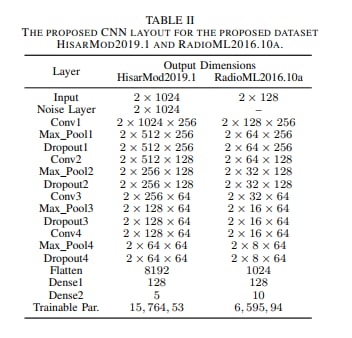

In [28]:
from rfml.nn.model import Model
import torch.nn as nn

In [62]:
import torch

import torch.nn as nn


class Net(nn.Module):
    def __init__(self, num_classes=26):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=2, out_channels=256, kernel_size=(3, 3), padding=(1, 1))
        self.relu1 = nn.ReLU(inplace=True)

        self.pool1 = nn.MaxPool2d(kernel_size=(1, 2))
        self.norm1 = nn.BatchNorm2d(num_features=256)
        
        self.conv2 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=(3, 3), padding=(1, 1))
        self.relu2 = nn.ReLU(inplace=True)
        
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 2))
        self.norm2 = nn.BatchNorm2d(num_features=128)

        self.conv3 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(3, 3), padding=(1, 1))
        self.relu3 = nn.ReLU(inplace=True)
        
        self.pool3 = nn.MaxPool2d(kernel_size=(1, 2))
        self.norm3 = nn.BatchNorm2d(num_features=64)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=(1, 1))
        self.relu4 = nn.ReLU(inplace=True)
        
        self.pool4 = nn.MaxPool2d(kernel_size=(1, 2))
        self.norm4 = nn.BatchNorm2d(num_features=64)

        self.fc1 = nn.Linear(in_features=64, out_features=128)
        self.relu6 = nn.ReLU(inplace=True)

        self.fc2 = nn.Linear(in_features=128, out_features=26)
        self.act = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.norm1(self.pool1(x))
        
        x = self.relu2(self.conv2(x))
        x = self.norm2(self.pool2(x))
        
        x = self.relu3(self.conv3(x))
        x = self.norm3(self.pool3(x))
        
        x = self.relu4(self.conv4(x))
        x = self.norm4(self.pool4(x))

        x = x.mean((2, 3), keepdim=True)
        x = torch.flatten(x, 1)

        x = self.relu6(self.fc1(x))
        x = self.act(self.fc2(x),)

        return x


In [63]:
model = Net(num_classes=26)
print(model)
device = "cuda"
model.to(device)
if torch.cuda.is_available():
    model.cuda()

Net(
  (conv1): Conv2d(2, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  (norm1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU(inplace=True)
  (pool2): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU(inplace=True)
  (pool3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  (norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU(inplace=True)
 

In [70]:
#summary(model,input_size = (1, 2, 1024), device = device)

In [65]:
from trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)
trainer = Trainer(
    model=model.cuda(),
    device=device,
    criterion=torch.nn.CrossEntropyLoss(),
    optimizer=optimizer,
    training_DataLoader=dstrain[0],
    validation_DataLoader=dsval[0],
    lr_scheduler= ReduceLROnPlateau(optimizer, 'min', verbose=True),
    epochs=80,
    epoch=0,
    notebook=True,
    )

In [66]:
training_losses1, validation_losses1, lr_rates1 = trainer.run_trainer()

Progress:   0%|          | 0/80 [00:00<?, ?it/s]

Training:   0%|          | 0/16640 [00:00<?, ?it/s]

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 1024]

In [ ]:
#x_test = pd.read_csv('signal_testv2.csv',usecols=range(1,1025))
#y_test = pd.read_csv('test_labelsv2.csv',usecols=range(1,2))